#### Importing Libraries

In [1]:
import pandas as pd
from rich.jupyter import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
import xgboost as xgb
# import lightgbm as lgb
import matplotlib.pyplot as plt
from IPython.display import display
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")
warnings.filterwarnings("ignore", category=UserWarning, module="LogisticRegression")


#### Load Data

In [2]:
# Assuming you have a pandas DataFrame named `df` with the player game stats.
df = pd.read_csv('../../data/player_game_statistics.csv')

#### Prepare Features and Target

In [3]:
# Check for missing values and fill them
df = df.dropna()
# df['country'].fillna('Unknown', inplace=True)  # Fill missing countries with 'Unknown'
# df.fillna(df.median(), inplace=True)  # Fill numerical columns with median

# Encode categorical variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  # Encode gender
# df['country'] = le.fit_transform(df['country'])  # Encode country
# df['game_name'] = le.fit_transform(df['game_name'])  # Encode game names
df['churned'] = le.fit_transform(df['churned'])  # Convert churned to binary

# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['country', 'game_name', 'player_level'], drop_first=True)
# df = pd.get_dummies(df, columns=['player_level'], drop_first=True)

# Extract features and target variable
X = df.drop(columns=['player_id', 'game_id', 'username', 'churned', 'last_played']) # Drop non-predictive columns
y = df['churned']  # Target variable

KeyError: 'churned'

In [4]:
display(X)

,age,gender,total_games_played,total_wins,total_losses,win_ratio,total_moves,highest_score,rating,country_Brazil,...,country_Vietnam,game_name_Checkers,game_name_Chess,game_name_Connect Four,game_name_Dots and Boxes,game_name_Hangman,game_name_Memory Match,game_name_Tic Tac Toe,player_level_Intermediate,player_level_Novice
0,75,0,13,1,0,88.89,803,78,3,False,...,False,False,False,False,False,False,False,False,False,False
1,44,3,10,1,0,37.50,598,77,2,False,...,False,False,False,False,False,False,False,False,True,False
2,40,2,11,0,1,20.00,542,68,1,False,...,False,False,False,False,False,False,False,False,True,False
3,64,2,8,0,1,37.50,453,79,2,False,...,False,False,False,False,False,False,False,False,True,False
4,30,0,10,1,0,100.00,561,79,3,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2564,23,0,7,0,1,33.33,192,36,2,False,...,False,False,False,False,False,True,False,False,False,True
2565,46,1,5,0,1,33.33,142,36,2,False,...,False,False,False,False,False,True,False,False,False,True
2566,39,0,7,0,1,20.00,182,37,1,False,...,False,False,False,False,False,True,False,False,False,True
2567,57,2,7,0,1,0.00,165,38,1,False,...,False,False,False,False,False,True,False,False,False,True


#### Train-Test Split

In [5]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Standardize features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Initialize models

In [7]:
# log_reg = LogisticRegression()
# rf_clf = RandomForestClassifier(random_state=42)
# gb_clf = GradientBoostingClassifier(random_state=42)
# svm_clf = SVC(probability=True, random_state=42)

#### Train models

In [8]:
# Logistic Regression
log_reg = LogisticRegression(class_weight='balanced',max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test)

print("Logistic Regression Performance:")
print(f'Accuracy: {accuracy_score(y_test, log_reg_pred)}')
print(classification_report(y_test, log_reg_pred, zero_division=0))


Logistic Regression Performance:
Accuracy: 0.290448343079922
              precision    recall  f1-score   support

           0       0.29      1.00      0.45       149
           1       0.00      0.00      0.00       364

    accuracy                           0.29       513
   macro avg       0.15      0.50      0.23       513
weighted avg       0.08      0.29      0.13       513



C:\Users\opeye\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [9]:
# Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Performance:")
print(f'Accuracy: {accuracy_score(y_test, rf_pred)}')
print(classification_report(y_test, rf_pred, zero_division=0))


Random Forest Performance:
Accuracy: 0.7095516569200779
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       149
           1       0.71      1.00      0.83       364

    accuracy                           0.71       513
   macro avg       0.35      0.50      0.42       513
weighted avg       0.50      0.71      0.59       513



C:\Users\opeye\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [10]:
# Gradient Boosting Machine (XGBoost)
xgb_model = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False,random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test)

print("XGBoost Performance:")
print(f'Accuracy: {accuracy_score(y_test, xgb_pred)}')
print(classification_report(y_test, xgb_pred, zero_division=0))


XGBoost Performance:
Accuracy: 0.7095516569200779
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       149
           1       0.71      1.00      0.83       364

    accuracy                           0.71       513
   macro avg       0.35      0.50      0.42       513
weighted avg       0.50      0.71      0.59       513



In [11]:
# Support Vector Machine (SVM)
svm_model = SVC(probability=True,random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test)

print("SVM Performance:")
print(f'Accuracy: {accuracy_score(y_test, svm_pred)}')
print(classification_report(y_test, svm_pred, zero_division=0))


C:\Users\opeye\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


SVM Performance:
Accuracy: 0.7095516569200779
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       149
           1       0.71      1.00      0.83       364

    accuracy                           0.71       513
   macro avg       0.35      0.50      0.42       513
weighted avg       0.50      0.71      0.59       513



In [12]:
# Train models
# log_reg.fit(X_train_scaled, y_train)
# rf_clf.fit(X_train, y_train)
# gb_clf.fit(X_train, y_train)
# svm_clf.fit(X_train_scaled, y_train)

#### Ensemble Voting Classifier

In [13]:
# Ensemble Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('svm', svm_model)
    ],
    voting='soft'
)
voting_clf.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(class_weight='balanced',
                                                 max_iter=1000,
                                                 random_state=42)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_round...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('svm', SVC(probability=True, random_state=42))],
                 voting='soft')

#### Model Evaluation

In [14]:
models = {
    'Logistic Regression': log_reg,
    'Random Forest': rf_model,
    'Gradient Boosting': xgb_model,
    'SVM': svm_model,
    'Voting Classifier': voting_clf
}

for name, model in models.items():
    if name == 'Random Forest' or name == 'Gradient Boosting':
        preds = model.predict(X_test)
        probs = model.predict_proba(X_test)[:, 1]
    else:
        preds = model.predict(X_test_scaled)
        probs = model.predict_proba(X_test_scaled)[:, 1]

    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, preds):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, probs):.4f}")
    print(classification_report(y_test, preds, zero_division=0))

--- Logistic Regression ---
Accuracy: 0.6296
ROC-AUC: 0.6723
              precision    recall  f1-score   support

           0       0.41      0.64      0.50       149
           1       0.81      0.62      0.70       364

    accuracy                           0.63       513
   macro avg       0.61      0.63      0.60       513
weighted avg       0.69      0.63      0.65       513

--- Random Forest ---
Accuracy: 0.7096
ROC-AUC: 0.4998
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       149
           1       0.71      1.00      0.83       364

    accuracy                           0.71       513
   macro avg       0.35      0.50      0.42       513
weighted avg       0.50      0.71      0.59       513



C:\Users\opeye\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\opeye\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


--- Gradient Boosting ---
Accuracy: 0.7096
ROC-AUC: 0.5572
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       149
           1       0.71      1.00      0.83       364

    accuracy                           0.71       513
   macro avg       0.35      0.50      0.42       513
weighted avg       0.50      0.71      0.59       513

--- SVM ---
Accuracy: 0.7173
ROC-AUC: 0.6222
              precision    recall  f1-score   support

           0       0.54      0.18      0.27       149
           1       0.74      0.94      0.82       364

    accuracy                           0.72       513
   macro avg       0.64      0.56      0.55       513
weighted avg       0.68      0.72      0.66       513

--- Voting Classifier ---
Accuracy: 0.7973
ROC-AUC: 0.8224
              precision    recall  f1-score   support

           0       0.84      0.38      0.52       149
           1       0.79      0.97      0.87       364

    accuracy       

In [15]:
# Predictions
log_reg_pred = log_reg.predict(X_test_scaled)
xgb_pred = xgb_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test_scaled)
voting_pred = voting_clf.predict(X_test_scaled)

C:\Users\opeye\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [16]:
# Collecting all models' results
models = ['Logistic Regression', 'XGBoost', 'SVM', 'Random Forest', 'Voting Classifier']
accuracies = [
    accuracy_score(y_test, log_reg_pred),
    accuracy_score(y_test, xgb_pred),
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, voting_pred)
]

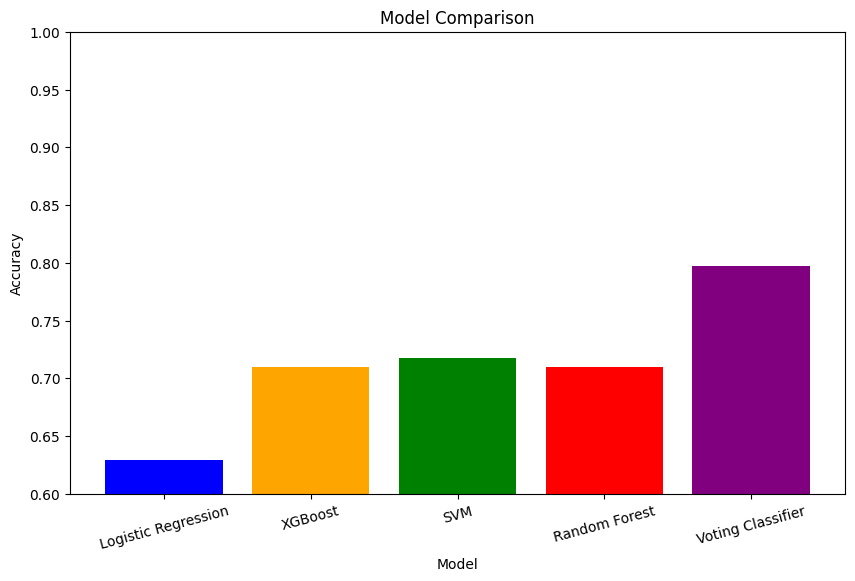

In [17]:
# Plotting the comparison
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0.6, 1.0)  # Adjust as necessary
plt.xticks(rotation=15)
plt.show()

In [18]:
# # Additional Evaluation using classification reports
# print("Logistic Regression Report:\n", classification_report(y_test, log_reg_pred))
# print("XGBoost Report:\n", classification_report(y_test, xgb_pred))
# print("SVM Report:\n", classification_report(y_test, svm_pred))
# print("Random Forest Report:\n", classification_report(y_test, rf_pred))
# print("Voting Classifier Report:\n", classification_report(y_test, voting_pred))